# 감성분석
감성분석(Sentiment Analysis)은 문서의 주관적인 감성/의견/감정/기분 등을 파악하기 위한 방법으로 소셜 미디어, 여론조사, 온라인 리뷰, 피드백 등 다양한 분야에서 활용되고 있습니다.

**지도 학습 기반의 분석**
- 지도학습은 학습 데이터와 **타깃 레이블 값**을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일합니다.
    
**감성 어휘 사전을 이용한 분석**
- 감성 어휘 사전은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단합니다.
- 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 **감성(Sentiment) 수치**를 계산하는 방법을 이용합니다.


    


## 실습

### 지도학습 기반 감성 분석 실습 – IMDB 영화평

In [11]:
import pandas as pd

review_df = pd.read_csv('./labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [ ]:
print(review_df['review'][0])

**데이터 사전 처리 html태그 제거 및 숫자문자 제거**

In [12]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )


**학습/테스트 데이터 분리**

In [ ]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

**Pipeline을 통해 Count기반 피처 벡터화 및 머신러닝 학습/예측/평가**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용하여 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.  
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

**Pipeline을 통해 TF-IDF기반 피처 벡터화 및 머신러닝 학습/예측/평가**

In [ ]:
# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

## 감성 어휘 사전 기반의 감성 분석
- SentiWordNet
    - NLTK 패키지의 WordNet과 유사하게 감성 단어 전용의 WordNet을 구현한 것입니다. SentiWordNet은 Synset(유의어, 동의어 집합)별로 3가지 감성 점수를 할당합니다.
        - 긍정 감성 지수 : 해당 단어가 감성적으로 얼마나 긍정적인가를 수치로 나타냄
        - 부정 감성 지수  얼마나 감성적으로 부정적인가를 수치로 나타냄
        - 객관성 지수 : 긍정/부정 감성 지수와 완전히 반대되는 개념으로 단어가 감성과 관계없이 얼마나 **객관적**인지를 수치로 나타낸 것
    - 문장별로 단어들의 긍정 감성 지수와 부정 감성 지수를 합산하여 최종 감성 지수를 계산하고 이에 기반해 감성이 긍정인지 부정인지를 결정합니다.
   
- VADER 
    - 주로 **소셜 미디어의 텍스트**에 대한 감성 분석을 제공하기 위한 패키지입니다.
    - 뛰어난 감성 분석 결과를 제공하며, 비교적 빠른 수행 시간을 보장해 **대용량 텍스트 데이터**에 잘 사용되는 패키지입니다.

- Pattern
    - 예측 성능 측면에서 가장 주목받는 패키지입니다. 
    - 파이썬 2.x버전에서만 동작합니다.
    
    
## SentiWordNet의 감성 지수
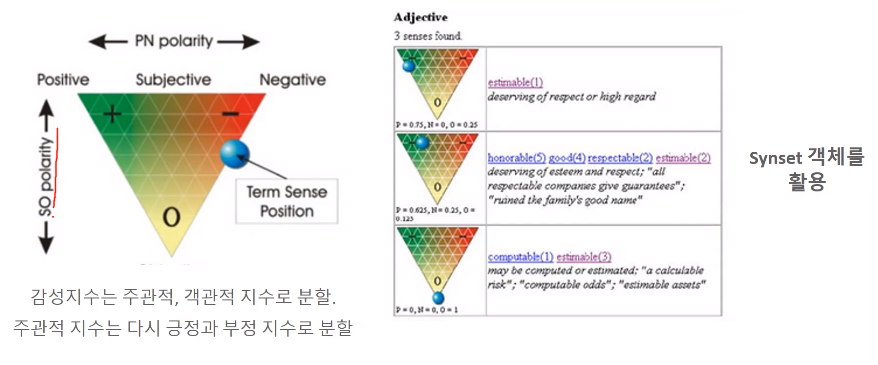
- 역삼각형의 위로갈수로 주관적, 내려갈수록 객관적이며, 왼쪽은 긍정적, 오른쪽은 부정적을 나타낸다.

## SentiWordNet을 이용한 감성 분석
1. 문서(Document)를 문장(Sentence) 단위로 분해
2. 다시 문장을 단어(Word) 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset(유의어, 동의어 집합)객체와 senti_synset 객체를 생성
4. Senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때는 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정

## VADER
- VADER는 소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon(사전)입니다.
- VADER는 **SentimentintensityAnalyzer 클래스**를 이용해 쉽게 감성 분석을 제공합니다.
- SentimentintensityAnalyzer 객체를 생성한 뒤에 문서별로 polarity_socres() 메서드를 호출해 감성 점수를 구한 뒤, 해당 문서의 감성 점수가 특정 임계값 이상이면 긍정, 그렇지 않으면 부정으로 판단합니다.
- neg는 부정 감성 지수, neu는 중립적인 감성 지수, pos는 긍정 감성 지수, 그리고 compound는 neg, neu, pos score를 적절히 조합해 -1에서 1사이의 감성 지수를 표현한 값입니다.
- compound score를 기반으로 부정 감성 또는 긍정 감성 여부를 결정합니다. 보통 0,1이상이면 긍정 감성, 그 이하면 부정감성으로 판단하나 상황에 따라 이 임계값을 적절히 조정해 예측성능을 조절합니다.

### 비지도학습 기반 감성 분석 소개
### SentiWordNet을 이용한 Sentiment Analysis 
* WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해

In [ ]:
import nltk
nltk.download('all')

In [ ]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성. 
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 갯수:', len(synsets))
print('synsets() 반환 값 :', synsets)

In [ ]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemmas:',synset.lemma_names())

In [ ]:
# synset 객체를 단어별로 생성합니다. 
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정합니다. 
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장합니다.  
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)


In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous .pos_score())
print('fabulous 부정감성 지수: ',fabulous .neg_score())

In [ ]:
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0


In [ ]:
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

print(confusion_matrix( y_target, preds))
print("정확도:", accuracy_score(y_target , preds))
print("정밀도:", precision_score(y_target , preds))
print("재현율:", recall_score(y_target, preds))

### VADER lexicon을 이용한 Sentiment Analysis

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [14]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values



In [15]:
print('#### VADER 예측 성능 평가 ####')
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

print(confusion_matrix( y_target, vader_preds))
print("정확도:", accuracy_score(y_target , vader_preds))
print("정밀도:", precision_score(y_target , vader_preds))
print("재현율:", recall_score(y_target, vader_preds))


#### VADER 예측 성능 평가 ####
[[ 6736  5764]
 [ 1867 10633]]
정확도: 0.69476
정밀도: 0.6484722815149113
재현율: 0.85064
